<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Sarina Heshmati


In [152]:
student_number = 401109477
full_name = 'Sadegh Mohammadian'
assert student_number and full_name is not None, 'please input your information'

In [153]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Configure visualizations
sns.set(style="whitegrid")

## Overview

In this assignment, you will explore a dataset containing information about employees and use that data to train models capable of predicting whether those employees have left the company (attrited) or not. You will start by exploring the dataset, analyzing its features, and performing necessary preprocessing steps (such as label encoding and scaling). Then, you will build and evaluate implementations of K-Nearest Neighbors (KNN) as well as Random Forest, Bagging, and AdaBoost classifiers. After training and tuning each model, you’ll compare their performance using metrics like accuracy and feature importance to identify the best approach for accurate attrition prediction.

# Load and Explore Dataset (10 points)

In [154]:
import pandas as pd

# Load the dataset
# "Attrition" is our target columm

df = pd.read_csv('dataset.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


Explore the dataset and get familiar with its features and statistics. (don't worry about the 'masked values' in our target column. They are simply used to automatically test your model later on.)

              Age    DailyRate  DistanceFromHome   Education  EmployeeCount  \
count  902.000000   902.000000        902.000000  902.000000          902.0   
mean    36.832594   797.782705          9.433481    2.952328            1.0   
std      9.306933   405.292650          8.248331    1.041295            0.0   
min     18.000000   103.000000          1.000000    1.000000            1.0   
25%     30.000000   459.750000          2.000000    2.000000            1.0   
50%     35.000000   801.500000          7.000000    3.000000            1.0   
75%     43.000000  1156.250000         15.000000    4.000000            1.0   
max     60.000000  1496.000000         29.000000    5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count      902.000000               902.000000  902.000000      902.000000   
mean      1014.508869                 2.688470   67.124169        2.721729   
std        608.153731                 1.103652   20.55

<ipython-input-155-4ee3536f258e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


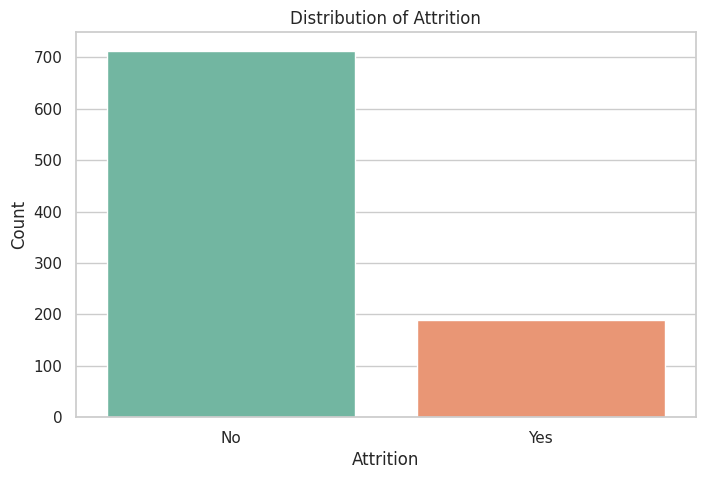

In [155]:
print(df.describe())
print(25*'=')

print(df.info())
print(25*'=')

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(25*'=')

attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)
print(25*'=')

plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()



It is generally better to remove columns with only one unique value from a DataFrame when preparing data for a decision tree. <br>
Such columns do not provide any useful information for splitting the data and can lead to unnecessary complexity in the model. Remove the said columns from the DataFrame.

In [156]:
# TODO Measure and print the number of unique values for each column.
# Check if there are any columns with less than 2 unique values. If so, remove them.

unique_values= {}

unique_values = df.nunique()
print("Number of unique values for each column:")
print(unique_values)

cols_to_remove = unique_values[unique_values == 1].index
if not cols_to_remove.empty:
    df.drop(columns=cols_to_remove, inplace=True)
    print(f"Removed columns with unique values: {list(cols_to_remove)}")


Number of unique values for each column:
Age                          42
Attrition                     2
BusinessTravel                3
DailyRate                   653
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeNumber              902
EnvironmentSatisfaction       4
Gender                        2
HourlyRate                   71
JobInvolvement                4
JobLevel                      5
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome               853
MonthlyRate                 888
NumCompaniesWorked           10
Over18                        1
OverTime                      2
PercentSalaryHike            15
PerformanceRating             2
RelationshipSatisfaction      4
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7

Look at the DataFrame and try to gather insight into people's monthly income and things that generally affect this number.

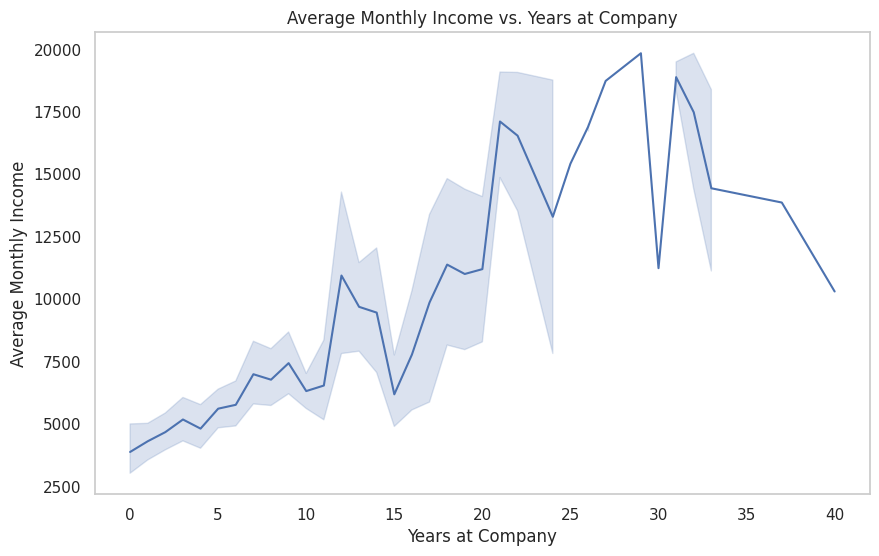

Department
Human Resources           6564.333333
Research & Development    6073.644444
Sales                     6817.394366
Name: MonthlyIncome, dtype: float64
Department with highest average income: Sales
Department with lowest average income: Research & Development


In [157]:
# TODO: Plot (lineplot) the average MonthlyIncome against the YearsAtCompany.
# TODO: Then find which departments have the highest and lowest incomes on average.
# Plot average MonthlyIncome against YearsAtCompany
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='YearsAtCompany', y='MonthlyIncome', estimator='mean')
plt.title('Average Monthly Income vs. Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Average Monthly Income')
plt.grid()
plt.show()

average_income_by_department = df.groupby('Department')['MonthlyIncome'].mean()
print(average_income_by_department)

highest_income_department = average_income_by_department.idxmax()
lowest_income_department = average_income_by_department.idxmin()

print(f"Department with highest average income: {highest_income_department}")
print(f"Department with lowest average income: {lowest_income_department}")

# Data Preprocessing (5 points)

Label Encode categorical columns and create a new DataFrame. Then split this data into train and test.

In [160]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

encoded_df = df.copy()
for col in categorical_cols:
    encoded_df[col] = label_encoder.fit_transform(df[col])

encoded_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,0,2,592,1,7,3,1,1883,4,...,3,2,0,11,2,3,3,2,1,2
1,34,0,2,1326,2,3,3,4,1478,4,...,3,4,0,15,2,3,13,9,3,12
2,27,0,2,954,2,9,3,2,1965,4,...,3,1,0,7,5,3,7,7,0,7
3,32,0,2,929,2,10,3,2,722,4,...,3,4,0,10,2,2,10,7,0,8
4,50,0,1,1234,1,20,5,3,1606,2,...,3,3,1,32,3,3,30,8,12,13


In [161]:
# Split into features and target variable
y = encoded_df['Attrition']
X = encoded_df.drop(columns=['Attrition'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors (KNN) Model (15 points)

Implement KNN model from scratch.

In [162]:
class CustomKNN:
    def __init__(self, k):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (numpy array): Training feature vectors.
        - y_train (numpy array): Training labels.
        """
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def euclidean_distance(self, x1, x2):
        """
        Calculate the Euclidean distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Euclidean distance between x1 and x2.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (numpy array): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)

        return most_common[0][0]

Fit and test your model using different k values and then choose the best one.

In [163]:
# Optional. You can choose any range of k values that you want.
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []
best_accuracy = 0
bestk = None

for k in k_values:
    knn = CustomKNN(k)
    knn.fit(X_train_scaled, y_train)
    y_pred_custom = knn.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred_custom)
    accuracies.append(accuracy)

    print(f'k: {k} - Accuracy: {accuracy}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        bestk = k

Best_custom_model = CustomKNN(bestk)
Best_custom_model.fit(X_train_scaled, y_train)


k: 1 - Accuracy: 0.7822878228782287
k: 3 - Accuracy: 0.8081180811808119
k: 5 - Accuracy: 0.8228782287822878
k: 7 - Accuracy: 0.8191881918819188
k: 9 - Accuracy: 0.8154981549815498
k: 11 - Accuracy: 0.8118081180811808
k: 13 - Accuracy: 0.8007380073800738
k: 15 - Accuracy: 0.8007380073800738


In [166]:
print(f'Best k: {bestk} - Best Accuracy: {best_accuracy}')
y_pred_best = Best_custom_model.predict(X_test_scaled)

# Print classification report for best model
print(classification_report(y_test, y_pred_best))

Best k: 5 - Best Accuracy: 0.8228782287822878
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       217
           1       0.62      0.28      0.38        54

    accuracy                           0.82       271
   macro avg       0.73      0.62      0.64       271
weighted avg       0.80      0.82      0.79       271



Visualize the confusion matrix for KNN predictions

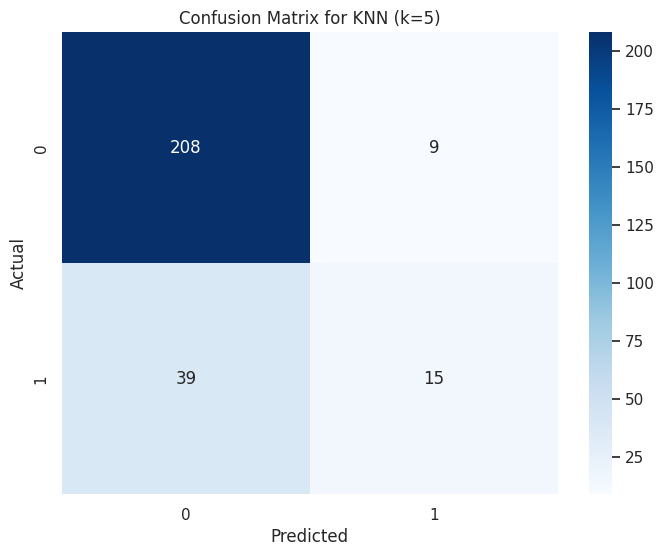

In [167]:
# TODO: Create a confusion matrix for KNN predictions
# Use confusion_matrix from sklearn.metrics
cm = confusion_matrix(y_test, y_pred_best)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix for KNN (k={bestk})')
plt.show()

## Evaluation (30 points)
In this part, we are going to evaluate your model's performance on another set of unseen data. Load test.csv (this data is already encoded), use your best_custom_model to predict and save the results in a DataFrame called 'result.csv'. The DataFrame should contain one column called 'target' that contains your model's predictions.

In [168]:
# Load test.csv
eval_df= pd.read_csv('test.csv')

# TODO: Use your old scaler to scale the data
# TODO: Predict using your model
model = CustomKNN(bestk)
model.fit(X_train_scaled, y_train)
X_eval = scaler.fit_transform(eval_df)
y_pred_eval = model.predict(X_eval)


Save the results in a DataFrame

In [169]:
# Save the results as a csv file
result_df= pd.DataFrame()
result_df['target']=pd.Series(y_pred_eval)
result_df.to_csv('result.csv', index= False)

# Random Forest Model (12 points)

Implement a random forest model using sklearn.

In [173]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {'n_estimators': [100, 200, 300],'max_depth': [10, 20, None],'min_samples_split': [2, 5, 10]}

rf_cv = GridSearchCV(rf, param_grid_rf, cv=5)
rf_cv.fit(X_train_scaled, y_train)
best_rf = rf_cv.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       217
           1       0.73      0.20      0.32        54

    accuracy                           0.83       271
   macro avg       0.78      0.59      0.61       271
weighted avg       0.81      0.83      0.78       271



Visualize the confusion matrix for Random Forest predictions

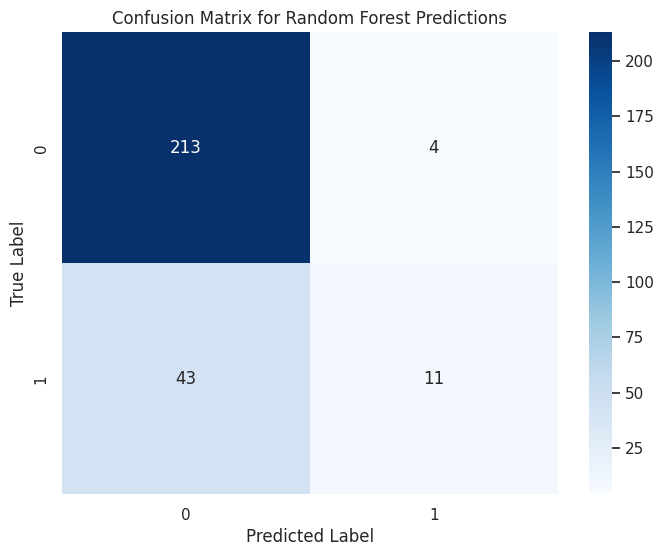

In [174]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Random Forest Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

A feature importance plot is a visual representation that illustrates the significance of each feature (or variable) in a machine learning model, particularly in the context of supervised learning tasks like classification and regression. Plot the feature importances using a bar plot.

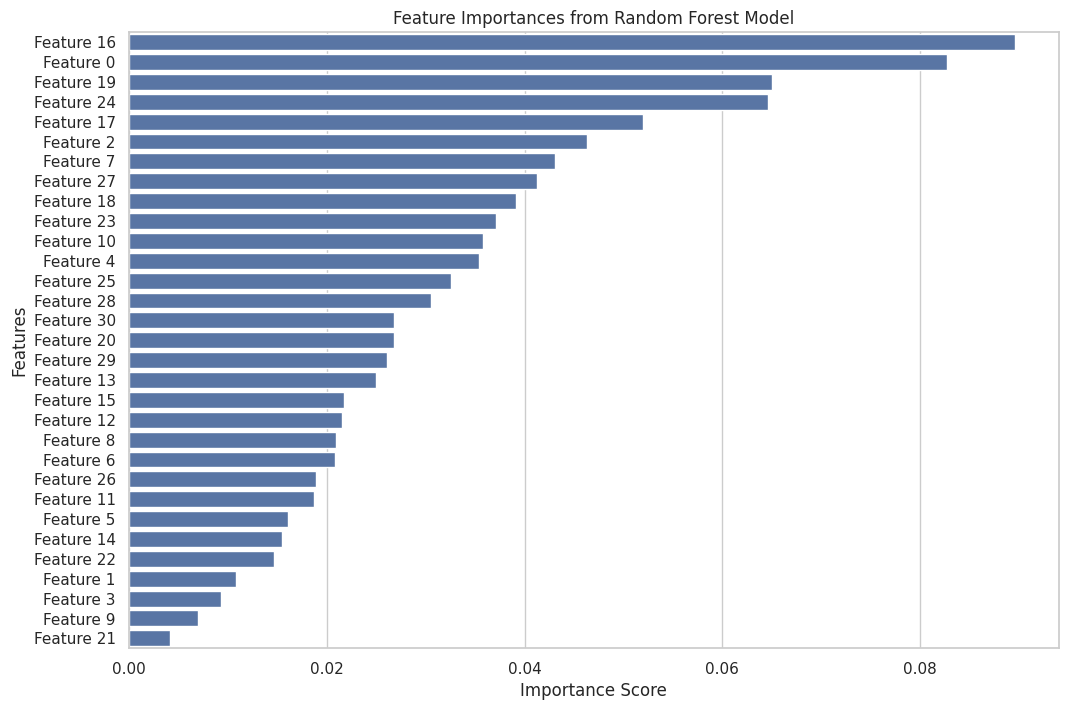

In [175]:
importances = best_rf.feature_importances_

indices = np.argsort(importances)[::-1]

feature_names = X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else [f'Feature {i}' for i in range(X_train_scaled.shape[1])]
feature_importance_df = pd.DataFrame({'Feature': np.array(feature_names)[indices],'Importance': importances[indices]})

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')

plt.tick_params(axis='y', rotation=0)
plt.show()

# Bagging with KNN (12 points)

In [177]:
bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=bestk), n_estimators=50, random_state=42)

bagging_knn.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_knn.predict(X_test_scaled)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

print(f"Bagging KNN Accuracy: {accuracy_bagging:.2f}")
print("Classification Report for Bagging KNN:")
print(classification_report(y_test, y_pred_bagging))

Bagging KNN Accuracy: 0.81
Classification Report for Bagging KNN:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       217
           1       0.59      0.19      0.28        54

    accuracy                           0.81       271
   macro avg       0.71      0.58      0.59       271
weighted avg       0.78      0.81      0.77       271



Visualize the confusion matrix for Baggin KNN predictions

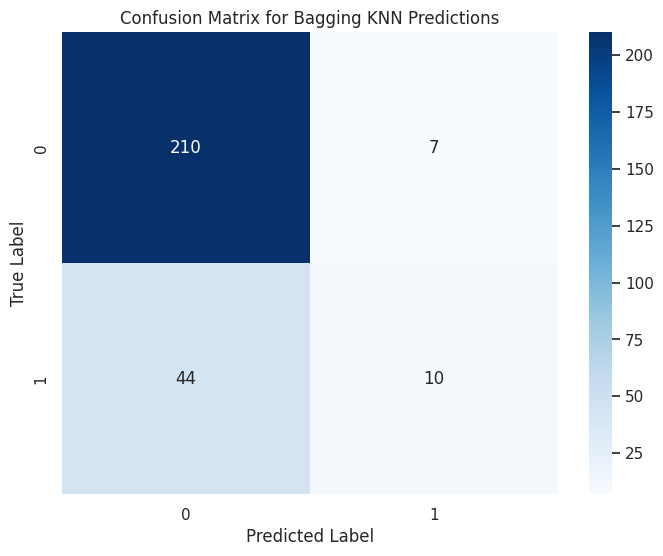

In [178]:
confusion_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_bagging, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Bagging KNN Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# AdaBoost Model (12 points)

In [179]:
adaboost = AdaBoostClassifier(random_state=42)

param_grid_ada = {'n_estimators': [50, 100, 150],'learning_rate': [0.01, 0.1, 1.0]}

adaboost_cv = GridSearchCV(adaboost, param_grid_ada, cv=5)
adaboost_cv.fit(X_train_scaled, y_train)
y_pred_adaboost = adaboost_cv.best_estimator_.predict(X_test_scaled)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost:.2f}")
print("Classification Report for AdaBoost:")
print(classification_report(y_test, y_pred_adaboost))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost Accuracy: 0.84
Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       217
           1       0.76      0.30      0.43        54

    accuracy                           0.84       271
   macro avg       0.80      0.64      0.67       271
weighted avg       0.83      0.84      0.81       271



Visualize the confusion matrix for AdaBoost predictions

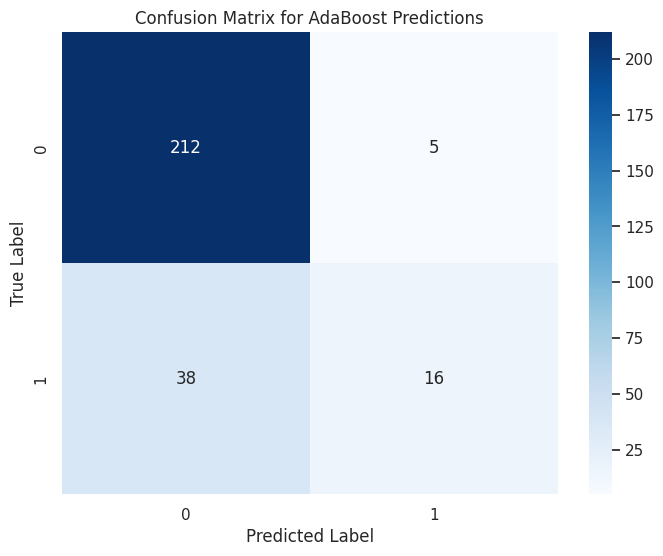

In [180]:
confusion_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_adaboost, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for AdaBoost Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model Comparison (4 points)

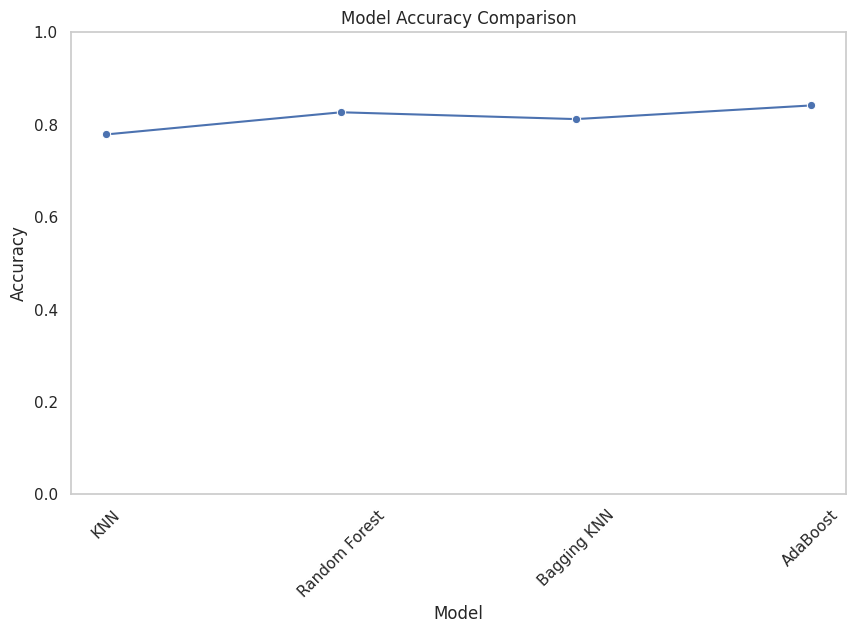

In [181]:
model_accuracies = {'Model': ['KNN', 'Random Forest', 'Bagging KNN', 'AdaBoost'],'Accuracy': [knn_accuracy, accuracy_rf, accuracy_bagging, accuracy_adaboost]}

accuracy_df = pd.DataFrame(model_accuracies)

plt.figure(figsize=(10, 6))
sns.lineplot(data=accuracy_df, x='Model', y='Accuracy', marker='o')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid()
plt.show()